Examples for accumulation model

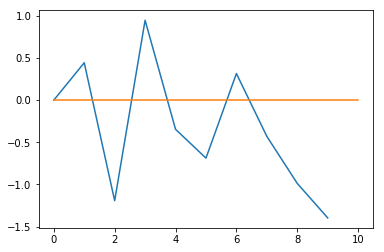

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

npts = 10
np.random.seed(2)
drift = np.ones(npts) * 0.5
noise = np.random.randn(npts)
drift[0] = 0
noise[0] = 0

unbounded = np.cumsum(drift + noise)
plt.plot(unbounded)
plt.plot([0, npts], [0, 0])

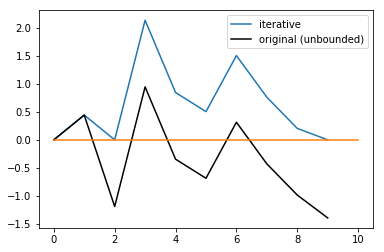

In [16]:
# what we want to happen
def at_least_0(num):
    return(np.max([0., num]))

accum_iterative = np.zeros(npts)
for i in range(1, npts):
    accum_iterative[i] = at_least_0(accum_iterative[i - 1] + drift[i] + noise[i])


plt.plot(accum_iterative)
plt.plot(unbounded, 'k-')
plt.legend(['iterative', 'original (unbounded)'])

plt.plot([0, npts], [0, 0])

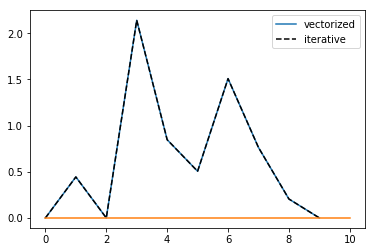

In [22]:
# a non-iterative version based on henry's suggestion

negative_spots = np.where(unbounded < 0)[0]
accum_vec = np.cumsum(drift + noise)

for neg_idx in negative_spots:
    if accum_vec[neg_idx] < 0:  # this will be true for the first index, but not necessarily the remaining indices
        accum_vec[neg_idx:] += -(accum_vec[neg_idx])

# first use clip to see that this does not reproduce the result from the iterative model
plt.plot(accum_vec)
plt.plot(accum_iterative, 'k--')
plt.legend(['vectorized', 'iterative'])
plt.plot([0, npts], [0, 0])

In [18]:
negative_spots = np.where(unbounded < 0)[0]
negative_spots

array([2, 4, 5, 7, 8, 9])

In [36]:
neg_offsets = np.abs(np.clip(unbounded, -np.inf, 0))
neg_offsets

array([0.        , 0.        , 1.19246292, 0.        , 0.3456277 ,
       0.68737507, 0.        , 0.42978173, 0.98773395, 1.39674157])

In [44]:
unbounded - accum_iterative

array([ 0.        ,  0.        , -1.19246292, -1.19246292, -1.19246292,
       -1.19246292, -1.19246292, -1.19246292, -1.19246292, -1.39674157])

In [41]:
incremented_offsets = np.zeros(npts)
offset = 0
for i in range(npts):
    if neg_offsets[i] > 0:
        offset += neg_offsets[i]
    else:
        offset = 0
    incremented_offsets[i] = offset



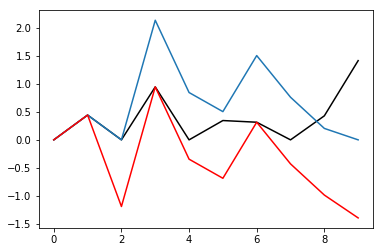

In [43]:
plt.plot(unbounded + incremented_offsets, 'k-')
plt.plot(accum_iterative)
plt.plot(unbounded, 'r-')

Try incrementing a cumulative sum of negative offsets that get added on

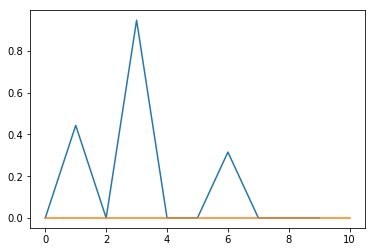

In [19]:
neg_offsets = np.abs(np.clip(unbounded, -np.inf, 0))

accum_vec_offsets = unbounded + neg_offsets

plt.plot(accum_vec_offsets)
plt.plot([0, npts], [0, 0])